<a href="https://colab.research.google.com/github/willablackmon/prophet-challenge/blob/main/forecasting_net_prophet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Forecasting Net Prophet

With over 200 million users, [MercadoLibre](http://investor.mercadolibre.com/about-us) is the most popular e-commerce site in Latin America. 

In thie project, we will analyze the company's financial and user data, seeking clever ways to make the company grow. 

Look for trends that can relate search traffic into stock value.

* 1: Identify unusual patterns in hourly Google search traffic
* 2: Mine the search traffic data for seasonality
* 3: Relate the search traffic to stock price patterns
* 4: Create a time series model with Prophet

## Install and import Prophet and the required libraries and dependencies

In [ ]:
# Install the required libraries
!pip install prophet

In [ ]:
# Import the required libraries and dependencies
import pandas as pd
from prophet import Prophet
import datetime as dt
import numpy as np
%matplotlib inline

## 1.  Identify Unusual Patterns in Hourly Google Search Traffic
  
Identify unusual patterns in the Google search data for the company, and connect them to the corporate financial events.

a. Read the search data into a DataFrame.  Slice data just for the month of May 2020, the month MercadoLibre released its quarterly financial results. Visualize the results and look for patterns.

b. Calculate the total search traffic for the month, and compare the value to the monthly median across all months. Note any increased Google search traffic during the month MercadoLibre released financial results.


#### Step 1: Read the search data into a DataFrame, and then slice the data to just the month of May 2020. (During this month, MercadoLibre released its quarterly financial results.) Visualize the results. Do any unusual patterns exist?

In [ ]:
# Store the data in a Pandas DataFrame
# Set the Date column as the Datetime Index.

df_mercado_trends = pd.read_csv(
    "https://static.bc-edx.com/ai/ail-v-1-0/m8/lms/datasets/google_hourly_search_trends.csv",
    index_col='Date',
    parse_dates=True
).dropna()

# Review the first and last five rows of the DataFrame
display(df_mercado_trends.head())
display(df_mercado_trends.tail())

<ipython-input-3-217fb1a948ac>:4: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df_mercado_trends = pd.read_csv(


,Search Trends
Date,
2016-06-01 00:00:00,97
2016-06-01 01:00:00,92
2016-06-01 02:00:00,76
2016-06-01 03:00:00,60
2016-06-01 04:00:00,38


,Search Trends
Date,
2020-09-07 20:00:00,71
2020-09-07 21:00:00,83
2020-09-07 22:00:00,96
2020-09-07 23:00:00,97
2020-09-08 00:00:00,96


In [ ]:
# Review the data types of the DataFrame using the info function
df_mercado_trends.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 37106 entries, 2016-06-01 00:00:00 to 2020-09-08 00:00:00
Data columns (total 1 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   Search Trends  37106 non-null  int64
dtypes: int64(1)
memory usage: 579.8 KB


In [ ]:
df_mercado_trends.columns

Index(['Search Trends'], dtype='object')

,Search Trends
Date,
2020-05-01 00:00:00,80
2020-05-01 01:00:00,80
2020-05-01 02:00:00,76
2020-05-01 03:00:00,66
2020-05-01 04:00:00,53


,Search Trends
Date,
2020-05-31 19:00:00,59
2020-05-31 20:00:00,64
2020-05-31 21:00:00,76
2020-05-31 22:00:00,90
2020-05-31 23:00:00,96


<Axes: title={'center': 'May 2020 Searches'}, xlabel='Date', ylabel='Search Trends'>

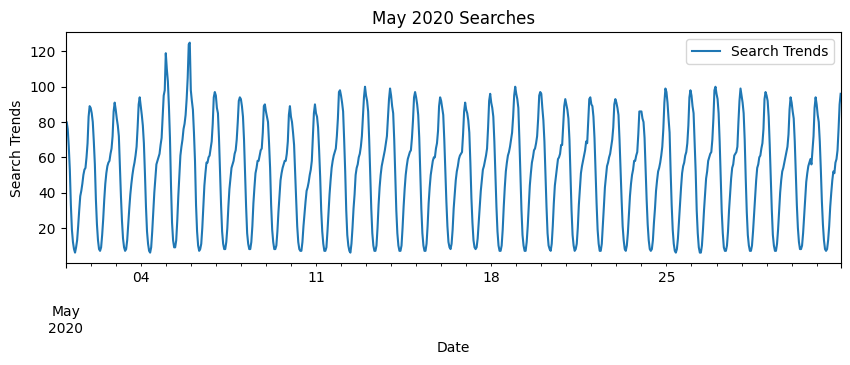

In [ ]:
# Slice the DataFrame to just the month of May 2020
df_may2020  = df_mercado_trends.loc['2020-05-01': '2020-05-31'].sort_index()

display(df_may2020.head())
display(df_may2020.tail())
# Plot to visualize the data for May 2020
df_may2020.plot(title="May 2020 Searches",
                        xlabel="Date",
                        ylabel="Search Trends",
                        figsize=[10,3])

#### b. Calculate the total search traffic for the month, and compare the value to the monthly median across all months. 
Note any increased Google search traffic during the month MercadoLibre released financial results.

In [ ]:
# Calculate the sum of the total search traffic for May 2020
traffic_may_2020 = df_may2020.sum()

# View the traffic_may_2020 value
traffic_may_2020

Search Trends    38181
dtype: int64

In [ ]:
df_mercado_trends.columns
display(df_mercado_trends.head())

,Search Trends
Date,
2016-06-01 00:00:00,97
2016-06-01 01:00:00,92
2016-06-01 02:00:00,76
2016-06-01 03:00:00,60
2016-06-01 04:00:00,38


Date  Date
2016  6       33196
      7       33898
      8       34459
      9       32376
      10      32334
Name: Search Trends, dtype: int64

<Axes: title={'center': 'Search Traffic for MercadoLibre by Month'}, xlabel='(year, month)', ylabel='total searches'>

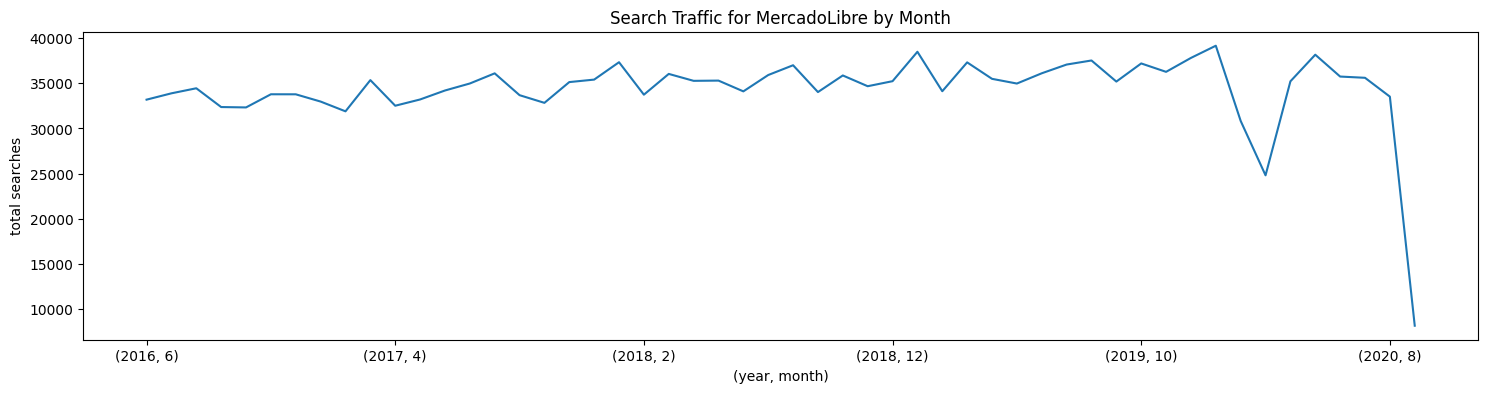

In [ ]:
# EXAMPLE,  looking at monthly sums
df_monthly = df_mercado_trends['Search Trends'].groupby([df_mercado_trends.index.year, df_mercado_trends.index.month])
df_monthly_sums = df_monthly.sum()

display(df_monthly_sums.head())
display(df_monthly_sums.plot(x="Date",y="Search Trends",title="Search Traffic for MercadoLibre by Month", figsize=(18,4),
                                           xlabel="(year, month)",ylabel="total searches"))

In [ ]:
# Calcluate the monthly median search traffic across all months
# Group the DataFrame by index year and then index month, chain the sum and then the median functions
median_monthly_traffic = df_mercado_trends['Search Trends'].groupby([df_mercado_trends.index.year, df_mercado_trends.index.month]).sum().median()

# View the median_monthly_traffic value
median_monthly_traffic

35172.5

In [ ]:
# Compare the seach traffic for the month of May 2020 to the overall monthly median value
may2020_to_monthly_med = traffic_may_2020/median_monthly_traffic
may2020_to_monthly_med

Search Trends    1.085536
dtype: float64

##### Answer the following question:

### Google search traffic increased during the month that MercadoLibre released its financial results.
Search traffic for May 2020 was 38,181 higher than the monthly median of 35,172.

## 2: Mine the Search Traffic Data for Seasonality

Mine hourly search data and predict interest in the company and its platform for any time of day.  Data could be used to inform marekting of the times of day that have the most traffic, allowing focus of marketing budget and increased ROI.

a. Group hourly search data to plot the average traffic by the hour of day. 
Determine if there are peaks at a particular time of day.

b. Group hourly search data to plot the average traffic by the day of the week.  
Determine if traffic get busiest on any particular day of the week.

c. Group hourly search data to plot the average traffic by the week of the year. 
Determine if search traffic tends to increase during the winter holiday period (weeks 40 through 52).


#### Sa. Group hourly search data to plot the average traffic by the hour of day. 
Determine if there are peaks at a particular time of day.


,Search Trends
Date,
0,88.324289
1,84.408150
2,76.419793
3,61.954075
4,43.720569


<Axes: title={'center': 'Search Traffic for MercadoLibre by Hour'}, xlabel='Hour of Day'>

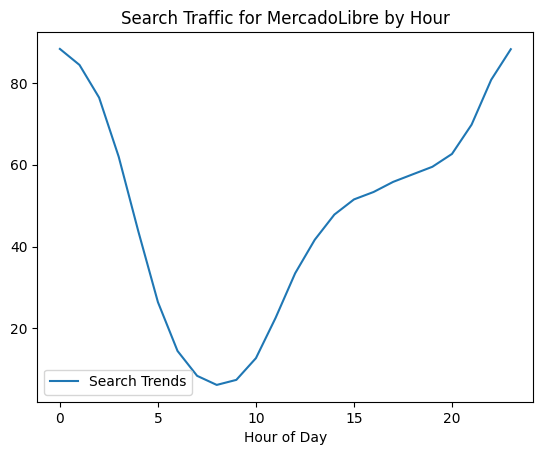

In [ ]:
# Group the hourly search data to plot the average traffic by the hour of the day., using `df.index.hour`

df_hourly_average = df_mercado_trends.groupby(df_mercado_trends.index.hour).mean()
display(df_hourly_average.head())
print()
df_hourly_average.plot(title="Search Traffic for MercadoLibre by Hour",
                             y = 'Search Trends', # figsize=(18,4),
                             xlabel = 'Hour of Day')

### Search traffic peaks at the end of the day (ramping up from 10th hour, slowing rate of increase around 15th hour, then ramping back up to the max from 20th to 24th hour.


#### b. Group hourly search data to plot the average traffic by the day of the week.  
Determine if traffic get busiest on any particular day of the week.

,Search Trends
day,
1,49.522813
2,50.571672
3,50.219604
4,49.699661
5,48.621041


<Axes: title={'center': 'Search Traffic for MercadoLibre by Day of Week'}, xlabel='Day of Week'>

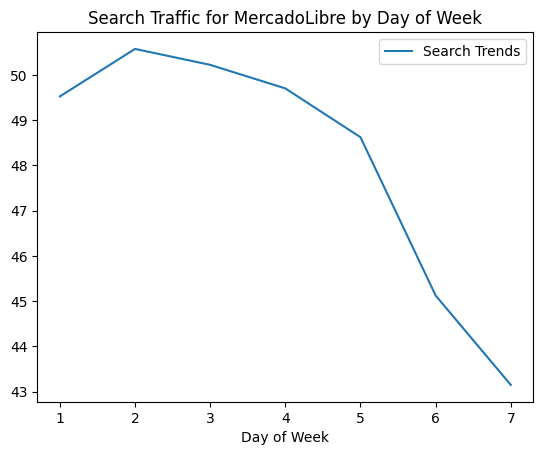

In [ ]:
# Group the search data to plot the average traffic by the day of week, using `df.index.isocalendar().day`.

df_day_of_week_avg = df_mercado_trends.groupby([df_mercado_trends.index.isocalendar().day]).mean()
# df_hr_avg_by_weekday = df_mercado_trends.groupby([df_mercado_trends.index.dayofweek]).mean()
display(df_day_of_week_avg.head())
df_day_of_week_avg.plot(title="Search Traffic for MercadoLibre by Day of Week",
                             y = 'Search Trends', # figsize=(18,4),
                             xlabel = 'Day of Week')

### Search traffic starts high on the 1st day of the week, peaking on the second day.  For the duration of the week there is a slow decline, until the 5th day of the week, where search traffic rate of decrease is more steep.

#### c. Group hourly search data to plot the average traffic by the week of the year. 
Determine if search traffic tends to increase during the winter holiday period (weeks 40 through 52).

,Search Trends
week,
1,44.924107
2,50.078869
3,50.474702
4,50.834821
5,50.084821


<Axes: title={'center': 'Search Traffic for MercadoLibre by Week of Year'}, xlabel='Week of the Year'>

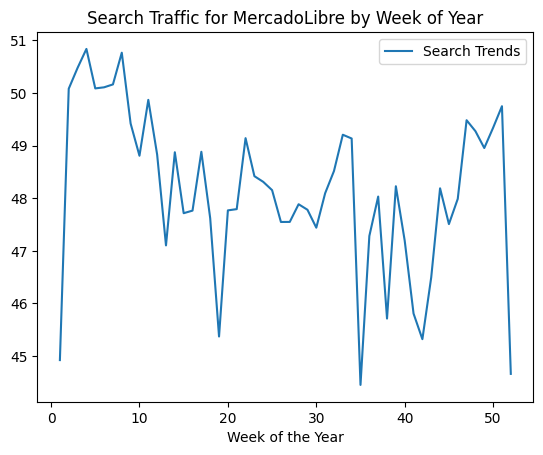

In [ ]:
# Group the hourly search data to plot the average traffic by the week of the year using `df.index.isocalendar().week`.
df_hr_avg_by_week = df_mercado_trends.groupby([df_mercado_trends.index.isocalendar().week]).mean()

display(df_hr_avg_by_week.head())
df_hr_avg_by_week.plot(title="Search Traffic for MercadoLibre by Week of Year",
                             y = 'Search Trends', # figsize=(18,4),
                             xlabel = 'Week of the Year')

### Search traffic tends to increase during the winter holiday period (weeks 40 through 52), beginning week 50 through week 51.  The increase/spike is seen again in the first 4 weeks of the year, where there is a drastic increase up through about week 8-10.  At this point, there is a slide down until about week 20, where another increase occurs.


### Time-Based Search Trends Summary

Hour: Searches drop off from beginning of the day until about the 8th hour, then slowly ramp back up, the rate slowing around the 15th-18th hour of the day (possibly commute time, returning home from work?) and climbing again from 20th hour to 24th hour.

Day: Searches by Day of the week start high on Day 1 (Monday), peaking on Day 2 (Tuesday) and slowly ramping down until Friday, then dropping more steeply on Saturday and Sunday.

Week of the Year: Searches start low / drop drastically in the Holiday Season, Dec/Jan time frame (Weeks 51 - 01).  Peaks are seen at around week 4 (late January), then dropping overall (with slightly erratic ups and downs).  

Searches dip again around week 19 (early May) and again week 35 (late August), which coincides with Memorial Day / start of Summer and Labor Day / end of Summer in the U.S..

## 3: Relate Search Traffic to Stock Price Patterns
Identify any relationship between the search data and the company stock price exists.

a. Read in and plot the stock price data. Concatenate the stock price data to the search data in a single DataFrame.

b. Market events related to the Covid pandemic emerged during the year of 2020 that many companies found difficult. 
But, after the initial shock to global financial markets, new customers and revenue increased for e-commerce platforms. 
    * Slice the data to the first half of 2020 (`2020-01` to `2020-06` in the DataFrame), and then plot the data. 
    * Determine if time-series indicate a common trend that’s consistent with this narrative.

c. Create new column in the DataFrame named “Lagged Search Trends” that offsets, or shifts, the search traffic by one hour. 
Create two additional columns:
    * “Stock Volatility”: holds exponentially weighted four-hour rolling average of company’s stock volatility
    * “Hourly Stock Return”: holds percent change of the company's stock price on an hourly basis

d. Review time-series correlation and determine if there is a predictable relationship exist between:
    * the lagged search traffic and the stock volatility or 
    * the lagged search traffic and the stock price returns


#### a. Read in and plot the stock price data. Concatenate the stock price data to the search data in a single DataFrame.

In [ ]:
# Upload the "mercado_stock_price.csv" file into Colab, then store in a Pandas DataFrame
# Set the "date" column as the Datetime Index.
df_mercado_stock = pd.read_csv(
    "https://static.bc-edx.com/ai/ail-v-1-0/m8/lms/datasets/mercado_stock_price.csv",
    index_col="date",
    parse_dates=True
).dropna()

# View the first and last five rows of the DataFrame
display(df_mercado_stock.head())
display(df_mercado_stock.tail())

,close
date,
2015-01-02 09:00:00,127.67
2015-01-02 10:00:00,125.44
2015-01-02 11:00:00,125.57
2015-01-02 12:00:00,125.40
2015-01-02 13:00:00,125.17


,close
date,
2020-07-31 11:00:00,1105.780
2020-07-31 12:00:00,1087.925
2020-07-31 13:00:00,1095.800
2020-07-31 14:00:00,1110.650
2020-07-31 15:00:00,1122.510


<Axes: xlabel='date'>

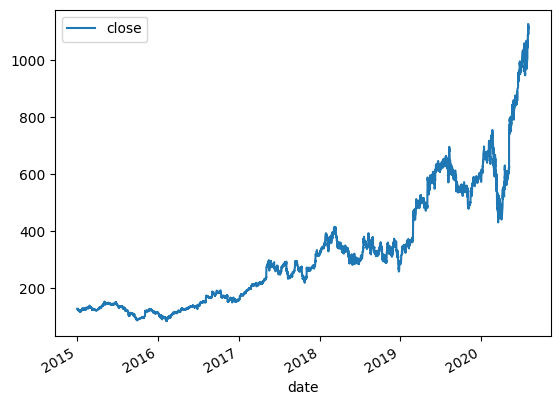

In [ ]:
# Visualize the closing price of the df_mercado_stock DataFrame
df_mercado_stock.plot()

In [ ]:
# Concatenate the df_mercado_stock DataFrame with the df_mercado_trends DataFrame
# Concatenate the DataFrame by columns (axis=1), and drop and rows with only one column of data

# Use a parameter of axis=1 to ensure the concatenation by columns
# Chain the dropna function to remove any rows of data that do not
# contain information in both columns

df_mercado = pd.concat([df_mercado_stock, df_mercado_trends], axis=1).dropna()

# View the first and last five rows of the DataFrame
display(df_mercado.head())
display(df_mercado.tail())

,close,Search Trends
2016-06-01 09:00:00,135.16,6.0
2016-06-01 10:00:00,136.63,12.0
2016-06-01 11:00:00,136.56,22.0
2016-06-01 12:00:00,136.42,33.0
2016-06-01 13:00:00,136.10,40.0


,close,Search Trends
2020-07-31 11:00:00,1105.780,20.0
2020-07-31 12:00:00,1087.925,32.0
2020-07-31 13:00:00,1095.800,41.0
2020-07-31 14:00:00,1110.650,47.0
2020-07-31 15:00:00,1122.510,53.0


#### b. Market events related to the Covid pandemic emerged during the year of 2020 that many companies found difficult. 
But, after the initial shock to global financial markets, new customers and revenue increased for e-commerce platforms. 
    * Slice the data to the first half of 2020 (`2020-01` to `2020-06` in the DataFrame), and then plot the data. 
    * Determine if time-series indicate a common trend that’s consistent with this narrative.


In [ ]:
# For the combined dataframe, slice to just the first half of 2020 (2020-01 through 2020-06)
df_2020_first = df_mercado['2020-01': '2020-06']

# View the first and last five rows of first_half_2020 DataFrame
display(df_2020_first.head())
display(df_2020_first.tail())

,close,Search Trends
2020-01-02 09:00:00,601.085,9.0
2020-01-02 10:00:00,601.290,14.0
2020-01-02 11:00:00,615.410,25.0
2020-01-02 12:00:00,611.400,37.0
2020-01-02 13:00:00,611.830,50.0


,close,Search Trends
2020-06-30 11:00:00,976.17,17.0
2020-06-30 12:00:00,977.50,27.0
2020-06-30 13:00:00,973.23,37.0
2020-06-30 14:00:00,976.50,45.0
2020-06-30 15:00:00,984.93,51.0


array([<Axes: >, <Axes: >], dtype=object)

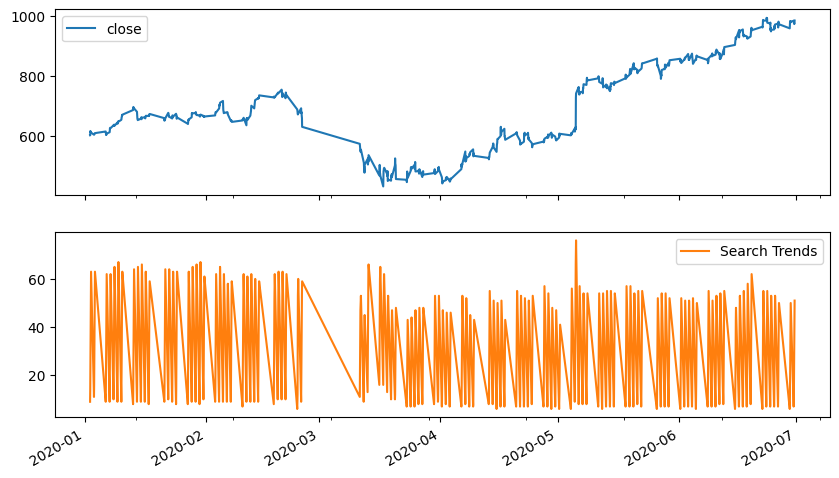

In [ ]:
# Visualize the close and Search Trends data
# Plot each column on a separate axes using the following syntax
# `plot(subplots=True)`
df_2020_first.plot(subplots=True, figsize=[10,6])

##### Answer the following question:

**Question:**  Market events emerged during the year of 2020 that many companies found difficult. But, after the initial shock to global financial markets, new customers and revenue increased for e-commerce platforms.

 Do both time series indicate a common trend that’s consistent with this narrative?

**Answer:**
There was a drastic drop in both Search Trends and Stock Price starting late February 2020 and bottoming out around mid-March 2020.  

From mid-March forward, there was a gradual increase in Search Trends, picking up a week into May, and continuing until the end of the period (July 2020).

After the drop, from mid-March, there was a quick recovery/increase of Stock Price, dropping slightly into the end of March, then remaining fairly steady over the next few months.

While Search Trends continued to trend higher than prior to the events of Feb/March 2020, stock price returned to it's pre-event value (approximately) and remained fairly steady.  Search Trends suggest increased interest in the company, but Stock Price did not really support the 'increased revenue/customers narrative.



#### c. Create new column in the DataFrame named “Lagged Search Trends” that offsets, or shifts, the search traffic by one hour. 
Create two additional columns:
    * “Stock Volatility”: holds exponentially weighted four-hour rolling average of company’s stock volatility
    * “Hourly Stock Return”: holds percent change of the company's stock price on an hourly basis




In [ ]:
# Create a new column in the mercado_stock_trends_df DataFrame called Lagged Search Trends
# This column should shift the Search Trends information by one hour (down by one row)

df_mercado_stock_trends = df_mercado.copy()
df_mercado_stock_trends['Lagged Search Trends'] = df_mercado_stock_trends['close'].shift(1)
df_mercado_stock_trends.head()


,close,Search Trends,Lagged Search Trends
2016-06-01 09:00:00,135.16,6.0,NaN
2016-06-01 10:00:00,136.63,12.0,135.16
2016-06-01 11:00:00,136.56,22.0,136.63
2016-06-01 12:00:00,136.42,33.0,136.56
2016-06-01 13:00:00,136.10,40.0,136.42


In [ ]:
# Create a new column in the mercado_stock_trends_df DataFrame called Stock Volatility
# This column should calculate the standard deviation of the closing stock price return data over a 4 period rolling window


df_mercado_stock_trends['Stock Volatility'] = df_mercado_stock_trends['close'].pct_change().rolling(window=4).std()
df_mercado_stock_trends.head()

,close,Search Trends,Lagged Search Trends,Stock Volatility
2016-06-01 09:00:00,135.16,6.0,NaN,NaN
2016-06-01 10:00:00,136.63,12.0,135.16,NaN
2016-06-01 11:00:00,136.56,22.0,136.63,NaN
2016-06-01 12:00:00,136.42,33.0,136.56,NaN
2016-06-01 13:00:00,136.10,40.0,136.42,0.006134


<Axes: >

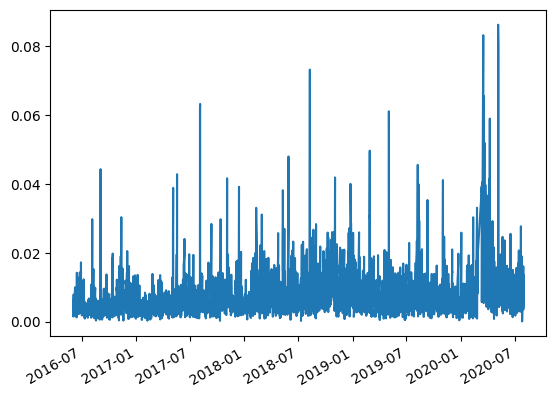

In [ ]:
# Visualize the stock volatility
df_mercado_stock_trends['Stock Volatility'].plot()


**Solution Note:** volatility spiked, and tended to stay high, during the first half of 2020. This is a common characteristic of volatility in stock returns worldwide: high volatility days tend to be followed by yet more high volatility days. When it rains, it pours.

In [ ]:
# Create a new column in the mercado_stock_trends_df DataFrame called Hourly Stock Return
# This column should calculate hourly return percentage of the closing price

df_mercado_stock_trends['Hourly Stock Return'] = df_mercado_stock_trends['close'].pct_change()

In [ ]:
# View the first and last five rows of the mercado_stock_trends_df DataFrame
display(df_mercado_stock_trends.head())
display(df_mercado_stock_trends.tail())

,close,Search Trends,Lagged Search Trends,Stock Volatility,Hourly Stock Return
2016-06-01 09:00:00,135.16,6.0,NaN,NaN,NaN
2016-06-01 10:00:00,136.63,12.0,135.16,NaN,0.010876
2016-06-01 11:00:00,136.56,22.0,136.63,NaN,-0.000512
2016-06-01 12:00:00,136.42,33.0,136.56,NaN,-0.001025
2016-06-01 13:00:00,136.10,40.0,136.42,0.006134,-0.002346


,close,Search Trends,Lagged Search Trends,Stock Volatility,Hourly Stock Return
2020-07-31 11:00:00,1105.780,20.0,1098.770,0.012837,0.006380
2020-07-31 12:00:00,1087.925,32.0,1105.780,0.013549,-0.016147
2020-07-31 13:00:00,1095.800,41.0,1087.925,0.013295,0.007239
2020-07-31 14:00:00,1110.650,47.0,1095.800,0.013001,0.013552
2020-07-31 15:00:00,1122.510,53.0,1110.650,0.013566,0.010678


#### d. Review time-series correlation and determine if there is a predictable relationship exist between:
    * the lagged search traffic and the stock volatility or 
    * the lagged search traffic and the stock price returns

In [ ]:
# Construct correlation table of Stock Volatility, Lagged Search Trends, and Hourly Stock Return
df_mercado_stock_trends[['Stock Volatility', 'Lagged Search Trends', 'Hourly Stock Return']].corr()

,Stock Volatility,Lagged Search Trends,Hourly Stock Return
Stock Volatility,1.000000,0.130565,0.061424
Lagged Search Trends,0.130565,1.000000,-0.000698
Hourly Stock Return,0.061424,-0.000698,1.000000


## 4: Create a Time Series Model with Prophet
Produce time-series model that analyzes and forecasts patterns in the hourly search data.
a. Set up Google search data for a Prophet forecasting model.
b. After estimating the model, plot the forecast. 
    * Analyze near-term forecast for the popularity of MercadoLibre.
c. Plot the individual time-series components of the model:
    * Time of day exhibits the greatest popularity?
    * Day of the week gets the most search traffic?
    * Identify lowest point for search traffic in calendar year.

#### a. Set up Google search data for a Prophet forecasting model.

In [ ]:
# Using the df_mercado_trends DataFrame, reset the index so the date information is no longer the index
df_mercado_trends_clean = df_mercado_trends.reset_index()

# Label the columns ds and y so that the syntax is recognized by Prophet
df_mercado_trends_clean = df_mercado_trends_clean.rename(columns={'Date': 'ds', 'Search Trends':'y'})
display(f"Rows: {len(df_mercado_trends_clean)}")

# Drop an NaN values from the prophet_df DataFrame
# # Confirm that there are no NaN values
df_mercado_trends_clean = df_mercado_trends_clean.dropna()

# View the first and last five rows of the mercado_prophet_df DataFrame
display(df_mercado_trends_clean.head())
display(df_mercado_trends_clean.tail())
display(f"Rows: {len(df_mercado_trends_clean)}")

'Rows: 37106'

,ds,y
0,2016-06-01 00:00:00,97
1,2016-06-01 01:00:00,92
2,2016-06-01 02:00:00,76
3,2016-06-01 03:00:00,60
4,2016-06-01 04:00:00,38


,ds,y
37101,2020-09-07 20:00:00,71
37102,2020-09-07 21:00:00,83
37103,2020-09-07 22:00:00,96
37104,2020-09-07 23:00:00,97
37105,2020-09-08 00:00:00,96


'Rows: 37106'

In [ ]:
# Call the Prophet function, store as an object
m = Prophet()
m

In [ ]:
# Fit the time-series model.
m.fit(df_mercado_trends_clean)

DEBUG:cmdstanpy:input tempfile: /tmp/tmplex24hha/n9b58db3.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmplex24hha/pdj7fdhd.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=3229', 'data', 'file=/tmp/tmplex24hha/n9b58db3.json', 'init=/tmp/tmplex24hha/pdj7fdhd.json', 'output', 'file=/tmp/tmplex24hha/prophet_modelrth4chuk/prophet_model-20240628153614.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
15:36:14 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
15:36:34 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [ ]:
# Create a future dataframe to hold predictions
# Make the prediction go out as far as 2000 hours (approx 80 days)
future_mercado_trends = m.make_future_dataframe(periods=2000, freq='H')

# View the last five rows of the future_mercado_trends DataFrame
display(future_mercado_trends.tail())

,ds
39101,2020-11-30 04:00:00
39102,2020-11-30 05:00:00
39103,2020-11-30 06:00:00
39104,2020-11-30 07:00:00
39105,2020-11-30 08:00:00


In [ ]:
# Make the predictions for the trend data using the future_mercado_trends DataFrame
forecast_mercado_trends = m.predict(future_mercado_trends)

# Display the first five rows of the forecast_mercado_trends DataFrame
display(forecast_mercado_trends.head())
display(forecast_mercado_trends.tail())

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,daily,...,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2016-06-01 00:00:00,44.469500,81.125084,98.266220,44.469500,44.469500,45.159722,45.159722,45.159722,41.452703,...,1.860594,1.860594,1.860594,1.846426,1.846426,1.846426,0.0,0.0,0.0,89.629222
1,2016-06-01 01:00:00,44.470406,77.950417,94.840351,44.470406,44.470406,41.605529,41.605529,41.605529,37.943556,...,1.810498,1.810498,1.810498,1.851474,1.851474,1.851474,0.0,0.0,0.0,86.075935
2,2016-06-01 02:00:00,44.471312,67.616318,84.645374,44.471312,44.471312,31.282049,31.282049,31.282049,27.656646,...,1.768912,1.768912,1.768912,1.856491,1.856491,1.856491,0.0,0.0,0.0,75.753361
3,2016-06-01 03:00:00,44.472218,52.470559,68.785510,44.472218,44.472218,16.014826,16.014826,16.014826,12.417424,...,1.735926,1.735926,1.735926,1.861476,1.861476,1.861476,0.0,0.0,0.0,60.487045
4,2016-06-01 04:00:00,44.473124,35.625575,52.377787,44.473124,44.473124,-1.100073,-1.100073,-1.100073,-4.677999,...,1.711496,1.711496,1.711496,1.866430,1.866430,1.866430,0.0,0.0,0.0,43.373051


,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,daily,...,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
39101,2020-11-30 04:00:00,45.156308,31.349461,48.586383,44.109075,46.015321,-5.374670,-5.374670,-5.374670,-4.677999,...,-1.746932,-1.746932,-1.746932,1.050262,1.050262,1.050262,0.0,0.0,0.0,39.781638
39102,2020-11-30 05:00:00,45.155571,16.171727,32.545844,44.107510,46.015312,-20.845066,-20.845066,-20.845066,-20.514465,...,-1.385050,-1.385050,-1.385050,1.054449,1.054449,1.054449,0.0,0.0,0.0,24.310504
39103,2020-11-30 06:00:00,45.154834,3.728146,20.666458,44.105946,46.015303,-32.809997,-32.809997,-32.809997,-32.844569,...,-1.024028,-1.024028,-1.024028,1.058599,1.058599,1.058599,0.0,0.0,0.0,12.344836
39104,2020-11-30 07:00:00,45.154096,-3.233344,13.003626,44.104382,46.015294,-40.081405,-40.081405,-40.081405,-40.477990,...,-0.666127,-0.666127,-0.666127,1.062713,1.062713,1.062713,0.0,0.0,0.0,5.072692
39105,2020-11-30 08:00:00,45.153359,-5.987418,11.268779,44.102916,46.015285,-42.275539,-42.275539,-42.275539,-43.028773,...,-0.313554,-0.313554,-0.313554,1.066789,1.066789,1.066789,0.0,0.0,0.0,2.877820


#### b. After estimating the model, plot the forecast. 
    * Analyze near-term forecast for the popularity of MercadoLibre.

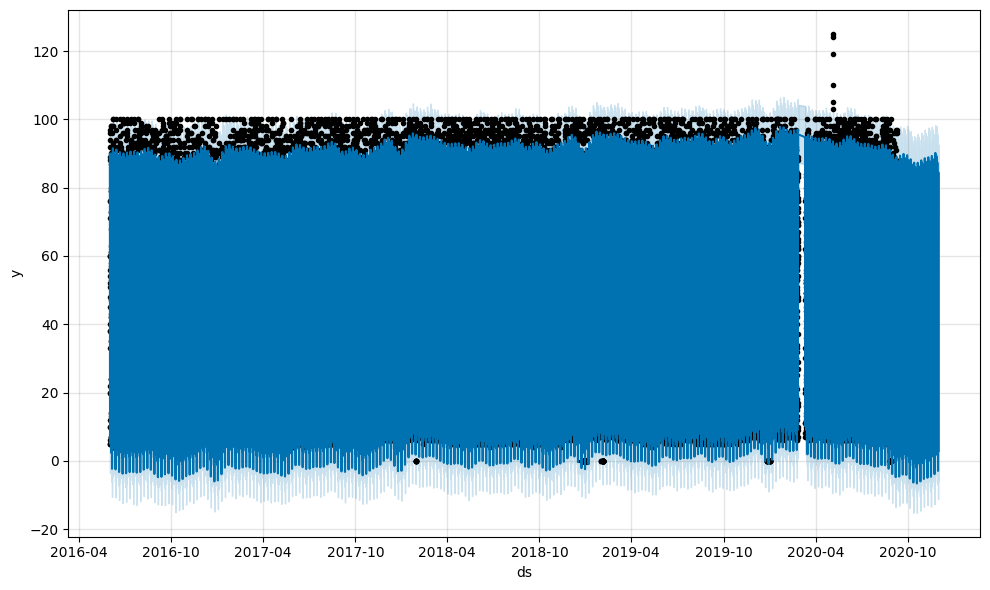

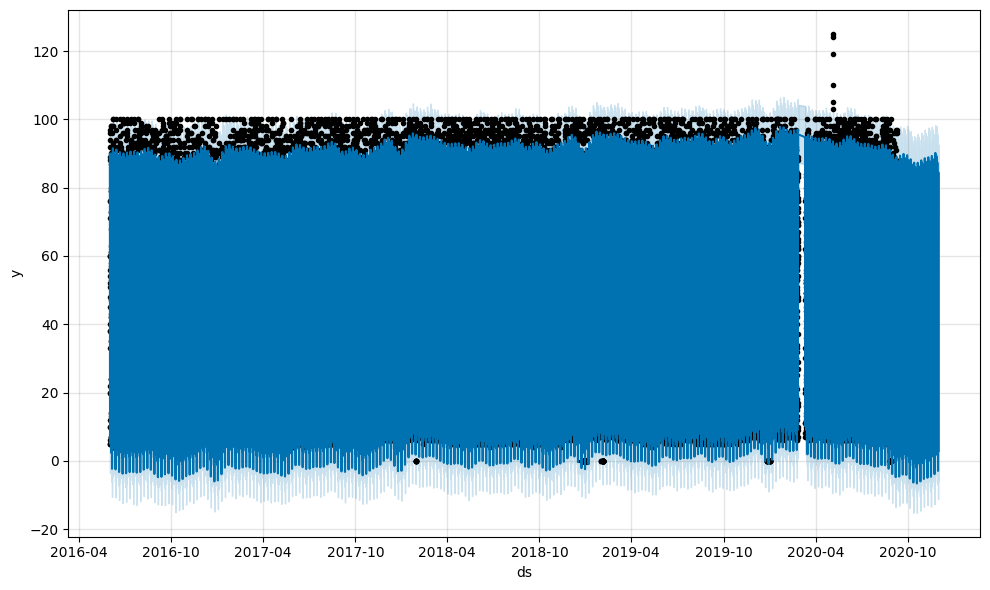

In [ ]:
# Plot the Prophet predictions for the Mercado trends data
m.plot(forecast_mercado_trends)

### The near-term forecast for the popularity of MercadoLibre appears to have a drop/dip coming in Searches/Popularity based on Searches over the next 80 days.


#### c. Plot the individual time-series components of the model:
    * Time of day exhibits the greatest popularity?
    * Day of the week gets the most search traffic?
    * Identify lowest point for search traffic in calendar year.


In [ ]:
# # Set the index in the forecast_mercado_trends DataFrame to the ds datetime column
forecast_mercado_trends_ds_index = forecast_mercado_trends.set_index('ds')

# View the only the yhat, yhat_lower and yhat_upper columns from the DataFrame
display(forecast_mercado_trends_ds_index[['yhat','yhat_lower','yhat_upper']].head())

forecast_mercado_trends_y = forecast_mercado_trends_ds_index[['yhat','yhat_lower','yhat_upper']]
display(forecast_mercado_trends_y.head())


,yhat,yhat_lower,yhat_upper
ds,,,
2016-06-01 00:00:00,89.629222,81.125084,98.266220
2016-06-01 01:00:00,86.075935,77.950417,94.840351
2016-06-01 02:00:00,75.753361,67.616318,84.645374
2016-06-01 03:00:00,60.487045,52.470559,68.785510
2016-06-01 04:00:00,43.373051,35.625575,52.377787


,yhat,yhat_lower,yhat_upper
ds,,,
2016-06-01 00:00:00,89.629222,81.125084,98.266220
2016-06-01 01:00:00,86.075935,77.950417,94.840351
2016-06-01 02:00:00,75.753361,67.616318,84.645374
2016-06-01 03:00:00,60.487045,52.470559,68.785510
2016-06-01 04:00:00,43.373051,35.625575,52.377787


Note: `yhat` represents the most likely (average) forecast, whereas `yhat_lower` and `yhat_upper` represents the worst and best case prediction (based on what are known as 95% confidence intervals).

<Axes: xlabel='ds'>

<Axes: xlabel='ds'>

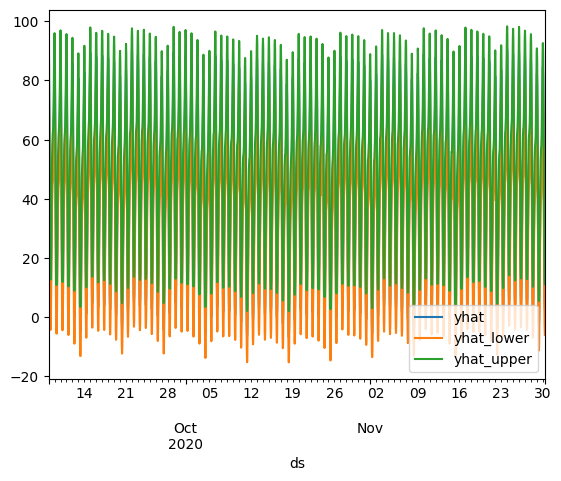

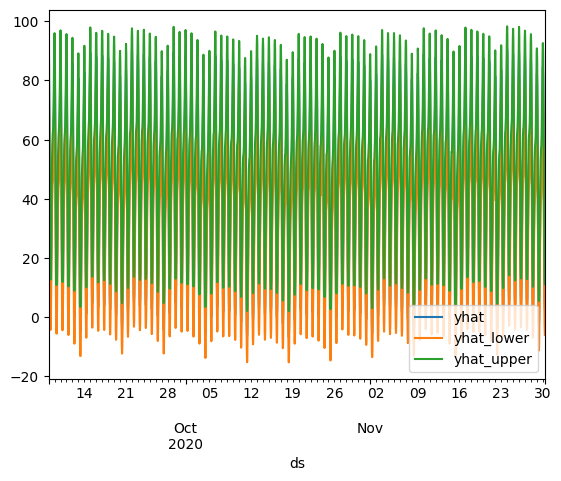

In [ ]:
# From the forecast_mercado_trends DataFrame, plot the data to visualize
#  the yhat, yhat_lower, and yhat_upper columns over the last 2000 hours

display(forecast_mercado_trends_ds_index[['yhat', 'yhat_lower', 'yhat_upper']].iloc[-2000:,:].plot())
display(forecast_mercado_trends_y.iloc[-2000:,].plot())


In [ ]:
# EXAMPLE Reset the index in the forecast_mercado_trends DataFrame

forecast_mercado_trends_y_reset = forecast_mercado_trends_y.reset_index()

display("forecast_mercado_trends_y: ")
display(forecast_mercado_trends_y.head())
display("forecast_mercado_trends_y_reset: ")
display(forecast_mercado_trends_y_reset.head())


'forecast_mercado_trends_y: '

,yhat,yhat_lower,yhat_upper
ds,,,
2016-06-01 00:00:00,89.629222,81.125084,98.266220
2016-06-01 01:00:00,86.075935,77.950417,94.840351
2016-06-01 02:00:00,75.753361,67.616318,84.645374
2016-06-01 03:00:00,60.487045,52.470559,68.785510
2016-06-01 04:00:00,43.373051,35.625575,52.377787


'forecast_mercado_trends_y_reset: '

,ds,yhat,yhat_lower,yhat_upper
0,2016-06-01 00:00:00,89.629222,81.125084,98.266220
1,2016-06-01 01:00:00,86.075935,77.950417,94.840351
2,2016-06-01 02:00:00,75.753361,67.616318,84.645374
3,2016-06-01 03:00:00,60.487045,52.470559,68.785510
4,2016-06-01 04:00:00,43.373051,35.625575,52.377787


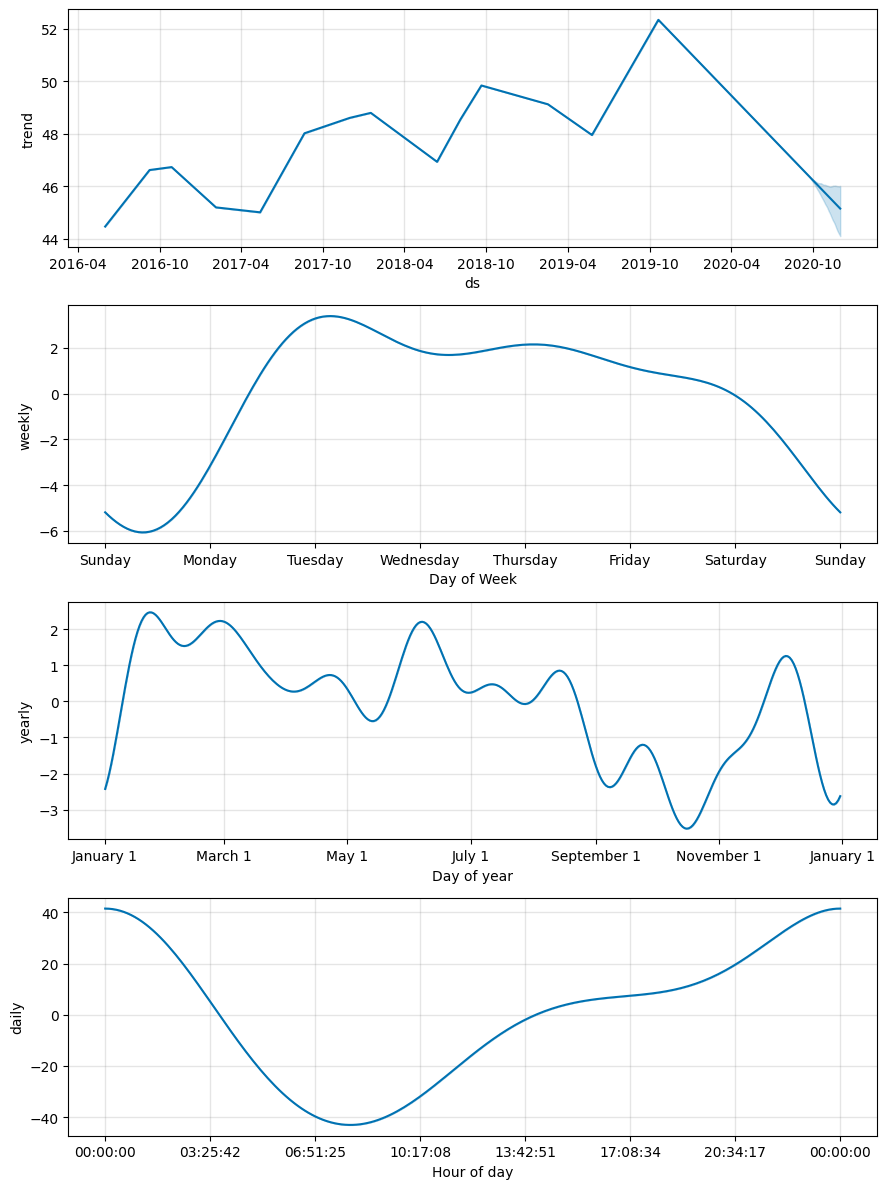

In [ ]:
# Reset the index in the forecast_mercado_trends DataFrame
forecast_mercado_trends_reset = forecast_mercado_trends_ds_index.reset_index()
# display(forecast_mercado_trends_reset.head())

# Use the plot_components function to visualize the forecast results for the DataFrame
fig_mercado = m.plot_components(forecast_mercado_trends_reset)

### The time of day exhibits the greatest popularity is 00:00, midnight.
### Day of week gets the most search traffic: Tuesday.
### Lowest point of the year for search traffic is Late December, early January, the end of the Holiday Season.